In [1]:
import os
import pretty_midi
import numpy as np
import pandas as pd
import lakh_midi
from hvo_sequence.custom_dtypes import Metadata
from hvo_sequence import HVO_Sequence

import lakh_midi
import matplotlib.pyplot as plt

/opt/anaconda3/envs/TripleStreams/lib/python3.9/site-packages/pydub/utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


In [2]:
midi_instrument_mapping = {
    "Piano": [0, 1, 2, 3, 4, 5, 6, 7],
    "Percussion": [8, 9, 10, 11, 12, 13, 14, 15],
    "Organ": [16, 17, 18, 19, 20, 21, 22, 23],
    "Guitar": [24, 25, 26, 27, 28, 29, 30, 31],
    "Bass": [32, 33, 34, 35, 36, 37, 38, 39],
    "Strings": [40, 41, 42, 43, 44, 45, 46, 47],
    "Ensemble": [48, 49, 50, 51, 52, 53, 54, 55],
    "Brass": [56, 57, 58, 59, 60, 61, 62, 63],
    "Reed": [64, 65, 66, 67, 68, 69, 70, 71],
    "Pipe": [72, 73, 74, 75, 76, 77, 78, 79],
    "Synth Lead": [80, 81, 82, 83, 84, 85, 86, 87],
    "Synth Pad": [88, 89, 90, 91, 92, 93, 94, 95],
    "Synth Effects": [96, 97, 98, 99, 100, 101, 102, 103],
    "Ethnic": [104, 105, 106, 107, 108, 109, 110, 111],
    "Percussive": [112, 113, 114, 115, 116, 117, 118, 119],
    "Sound Effects": [120, 121, 122, 123, 124, 125, 126, 127]
}

In [3]:
midi_instrument_counts_test = {
    "Piano": [],
    "Percussion": [],
    "Organ": [],
    "Guitar": [],
    "Bass": [],
    "Strings": [],
    "Ensemble": [],
    "Brass": [],
    "Reed": [],
    "Pipe": [],
    "Synth Lead": [],
    "Synth Pad": [],
    "Synth Effects": [],
    "Ethnic": [],
    "Percussive": [],
    "Sound Effects": [],
    "drums": []
}

In [35]:
# Quick check to see if the notes from the original MIDI files match the merged files that have been separated by instrument.
count = 0
for root, dir, files in os.walk('lakh_midi/untitled_folder'):
    for file in files:
        if file.endswith('.mid'):
            count += 1

            midi_instrument_counts = {
                "Piano": [],
                "Percussion": [],
                "Organ": [],
                "Guitar": [],
                "Bass": [],
                "Strings": [],
                "Ensemble": [],
                "Brass": [],
                "Reed": [],
                "Pipe": [],
                "Synth Lead": [],
                "Synth Pad": [],
                "Synth Effects": [],
                "Ethnic": [],
                "Percussive": [],
                "Sound Effects": [],
                "drums": []
            }
            orig_dir = 'lakh_midi/lmd_full/' + file[0] + '/'
            pm = pretty_midi.PrettyMIDI(os.path.join(orig_dir, file))
            for instrument in pm.instruments:
                if instrument.is_drum:
                    midi_instrument_counts["drums"].extend(instrument.notes)
                else:
                    for key in midi_instrument_mapping:
                        if instrument.program in midi_instrument_mapping[key]:
  
                            midi_instrument_counts[key].extend(instrument.notes)
            #for root, dir, files in os.walk('lakh_midi/lmd_merged'):
            for f in os.listdir('lakh_midi/lmd_merged/'+ file.split('.')[0]):
                if f.endswith('.mid'):
                    dir = 'lakh_midi/lmd_merged/' + file.split('.')[0]
                    pm_inst = pretty_midi.PrettyMIDI(os.path.join(dir, f))
                    #print(f)
                    for key in midi_instrument_counts:
                        #k = String(key)
                        if key.lower() in f:
                            #print('key in f')
                            #print(len(midi_instrument_counts[key]))
                            #print(len(pm_inst.instruments[0].notes))
                            #assert(len(midi_instrument_counts[key]) == len(pm_inst.instruments[0].notes))
                            if len(midi_instrument_counts[key]) != len(pm_inst.instruments[0].notes):
                                print(f"Mismatch in {file} for {key}: {len(midi_instrument_counts[key])} vs {len(pm_inst.instruments[0].notes)}")
                            
                            
                            
print(f"Processed {count} MIDI files.")
            
            
            

Mismatch in fc82f780ffe9ad0f40d20bfc31f2219a.mid for Bass: 375 vs 374
Processed 76 MIDI files.


In [79]:
instrument_types_for_hist = []
for root, dirs, files in os.walk('lmd_subset_merged'):
    for file in files:
        pm_hist = pretty_midi.PrettyMIDI(os.path.join(root, file))
        for instrument in pm_hist.instruments:
            instrument_types_for_hist.append(instrument.name)
    

In [ ]:
midi_instrument_mapping = {
    "Piano": [0, 1, 2, 3, 4, 5, 6, 7],
    "Percussion": [8, 9, 10, 11, 12, 13, 14, 15],
    "Organ": [16, 17, 18, 19, 20, 21, 22, 23],
    "Guitar": [24, 25, 26, 27, 28, 29, 30, 31],
    "Bass": [32, 33, 34, 35, 36, 37, 38, 39],
    "Strings": [40, 41, 42, 43, 44, 45, 46, 47],
    "Ensemble": [48, 49, 50, 51, 52, 53, 54, 55],
    "Brass": [56, 57, 58, 59, 60, 61, 62, 63],
    "Reed": [64, 65, 66, 67, 68, 69, 70, 71],
    "Pipe": [72, 73, 74, 75, 76, 77, 78, 79],
    "Synth Lead": [80, 81, 82, 83, 84, 85, 86, 87],
    "Synth Pad": [88, 89, 90, 91, 92, 93, 94, 95],
    "Synth Effects": [96, 97, 98, 99, 100, 101, 102, 103],
    "Ethnic": [104, 105, 106, 107, 108, 109, 110, 111],
    "Percussive": [112, 113, 114, 115, 116, 117, 118, 119],
    "Sound Effects": [120, 121, 122, 123, 124, 125, 126, 127]
}

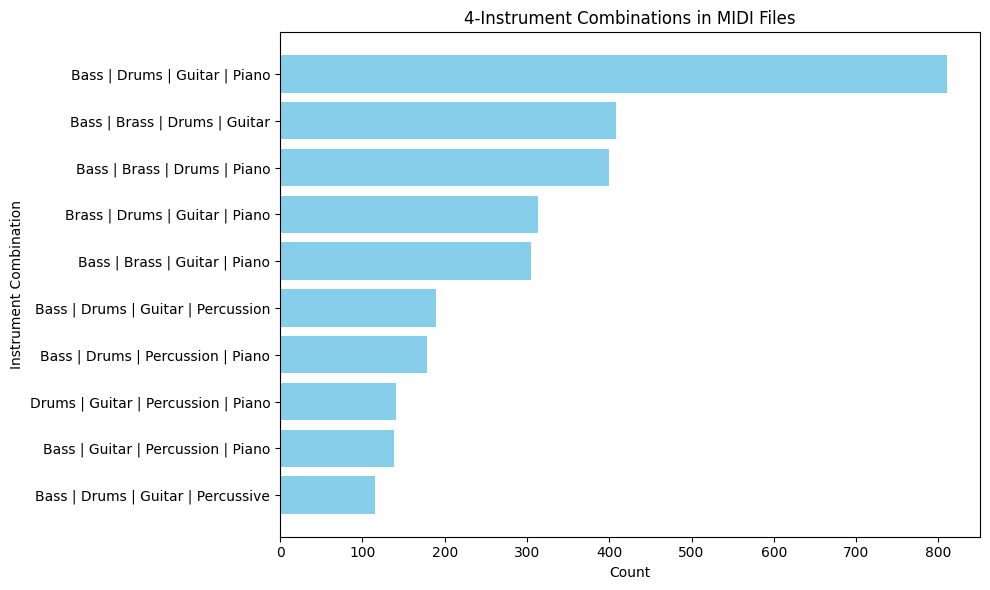

In [199]:
#most_common = combo_counts.most_common()

# Split into labels and values
labels = [' | '.join(combo) for combo, _ in combo_counts.most_common(10)]
values = [count for _, count in combo_counts.most_common(10)]

# Plot horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(labels, values, color='skyblue')
plt.xlabel("Count")
plt.ylabel("Instrument Combination")
plt.title("4-Instrument Combinations in MIDI Files")
plt.gca().invert_yaxis()  # So the highest bar is on top
plt.tight_layout()
plt.show()

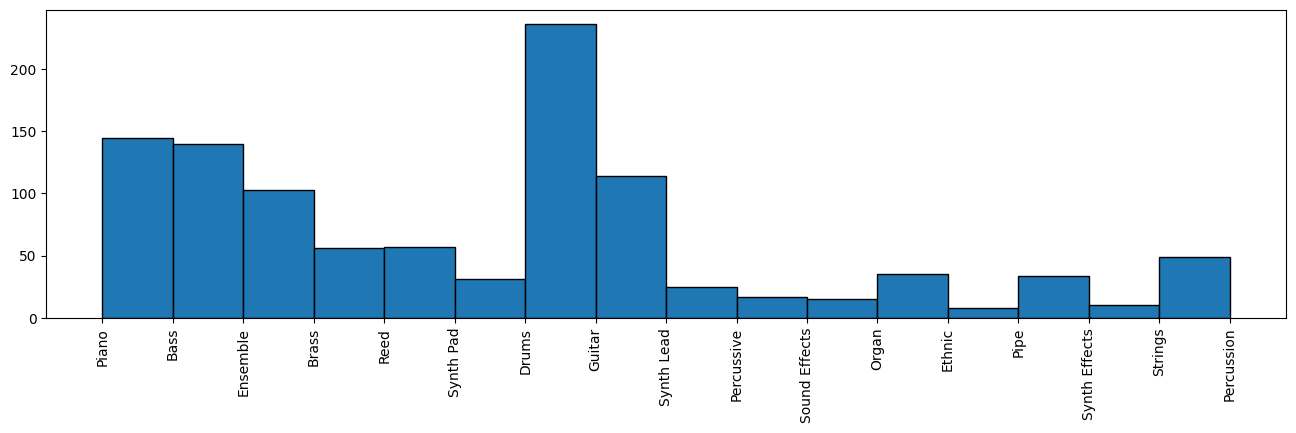

In [80]:
plt.figure(figsize=(16,4))
plt.hist(instrument_types_for_hist, edgecolor='black', bins=16)

plt.xticks(rotation=90)

plt.show()

In [40]:
p_test = pretty_midi.PrettyMIDI('lakh_midi/lmd_merged/0d1b564859e1e61a84994b38f7c86bc1/0d1b564859e1e61a84994b38f7c86bc1_bass.mid')

In [41]:
p_test.get_tempo_changes()

(array([0.]), array([93.000186]))

In [9]:
from hvo_sequence import midi_to_hvo_sequence

#Create Mapping for the MIDI values in the tracks. Since these are pitched, we make a mapping from [0, 127]
mapping_array = list(range(0,128))
PITCH_MAPPING = {
    'Instrument': mapping_array
}
os.makedirs('lmd_merged_hvo', exist_ok=True)
for root, dirs, files in os.walk('lakh_midi/lmd_merged'):
    for file in files:
        if file.endswith('.mid'):
          
            #We will use these values for metatdata
            name_remove_mid = file.split('.')[0]
         
            file_main_name = name_remove_mid.split('_')[0]
       
            file_instrument = name_remove_mid.split('_')[1]

            file_dir = 'lmd_merged_hvo/' + file_main_name
            os.makedirs(file_dir, exist_ok=True)

            hvo_seq = midi_to_hvo_sequence(
                    filename= os.path.join(root, file),
                    drum_mapping=PITCH_MAPPING,
                    beat_division_factors=[4])
            
            metadata_first_bar = Metadata({
                'filename': file,
                'main_file': file_main_name,
                'instrument': file_instrument,
                'source': 'Lakh MIDI'})
        
            hvo_seq.metadata = metadata_first_bar
            hvo_seq.save(os.path.join(file_dir, name_remove_mid))
        #
        # Because we're loading from midi, we might not need all this down there
        #-------------
        # #Load midi file so we can get the tempo and time signature
        # pm = pretty_midi.PrettyMIDI(os.path.join(root, file))
        # tempo_times, tempi = pm.get_tempo_changes()
        # # Add time_signature
        # hvo_seq.add_time_signature(time_step=0, numerator=4, denominator=4)
        # # Add tempo
        # hvo_seq.add_tempo(time_step=0, qpm=tempi[0])
        

       

In [12]:
from pickle import load
hvo_1_lakh = load(open("lmd_merged_hvo/0a0b59b984e78fccd380b44938a17ad4/0a0b59b984e78fccd380b44938a17ad4_bass.hvo", "rb"))

In [22]:
print(hvo_1_lakh.velocities)

[[0.        ]
 [0.        ]
 [0.        ]
 ...
 [0.        ]
 [0.        ]
 [0.88188976]]


In [23]:
from bokeh.io import output_notebook, show
output_notebook()
hvo_1_lakh.to_html_plot(
    filename="hvo_1_lakh.html",
    save_figure=False,
    show_figure=True)

Loading BokehJS ...

figure(id='p1004', ...)

Below - Verified tempos and time sigs are correctly passed